In [44]:
import json 
import pandas as pd 
from pandasql import sqldf
import string
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
import datetime as dt

# 1. data cleaning

In [46]:
with open('data/US_category_id.json') as f:
    cat_data = json.load(f)
    ID = [int(x.get('id')) for x in cat_data.get('items')]
    category = [x.get('snippet').get('title')for x in cat_data.get('items')]
    category_id_dict = dict(zip(ID, category))
    #print(category_id_dict)
    
vid_data_df = pd.read_csv('data/USvideos.csv', parse_dates = ['publish_time'])
vid_data_df['category_name'] = vid_data_df['category_id'].map(category_id_dict)
vid_data_df = vid_data_df.drop(['thumbnail_link', 'category_id', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed'],axis=1)
vid_data_df['trending_date'] = vid_data_df['trending_date'].apply(lambda x: dt.datetime.strptime(x,'%y.%d.%m'))
#print(vid_data_df.isnull().sum())
#print(vid_data_df)

In [47]:
vid_data_df

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,description,category_name
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,I know it's been a while since we did this sho...,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,2018-05-18 13:00:04+00:00,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,The Cat Who Caught the Laser - Aaron's Animals,Pets & Animals
40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,2018-05-18 01:00:06+00:00,[none],1064798,60008,382,3936,NaN,People & Blogs
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,2018-05-18 17:34:22+00:00,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,I had so much fun transforming Safiyas hair in...,Entertainment
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,2018-05-17 17:00:04+00:00,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,How Black Panther Should Have EndedWatch More ...,Film & Animation


# 2. word clouds
## example: https://www.geeksforgeeks.org/generating-word-cloud-python/
## (unfinshed)

## count each words (copy from hw7)

In [34]:
# input is one column, return a list of the number of each word
def count(data):
    wordDict={} # used to store the numbers of words. 
    for words in data:
        words=str(words).split()
        for word in words:
            # strip punctuations
            word=word.strip(string.punctuation)
            # covert it to lowercase
            word=word.lower()
            # count the number of each word
            wordDict[word] = wordDict.get(word,0)+1
    # transfer data from the dictionary to a list so that we can sort
    wordList=[]
    for k,v in wordDict.items():
        wordList.append((v,k))
    wordList.sort(reverse=True)
    return wordList

In [36]:
count(vid_data_df['title'])[0:20]

[(25383, ''),
 (9989, 'the'),
 (4814, 'a'),
 (4286, 'to'),
 (3941, 'official'),
 (3363, 'in'),
 (3166, 'of'),
 (2864, 'video'),
 (2834, 'with'),
 (2364, 'on'),
 (2343, 'and'),
 (2238, '2018'),
 (2048, 'i'),
 (2039, 'my'),
 (2000, 'trailer'),
 (1839, 'how'),
 (1790, 'for'),
 (1721, 'is'),
 (1712, 'you'),
 (1301, 'ft')]

# 3. analysis of published and trending dates
## (unfinshed. I'm gonna split it into weekdays and try more charts)

In [38]:
trend=vid_data_df.groupby('trending_date').mean()

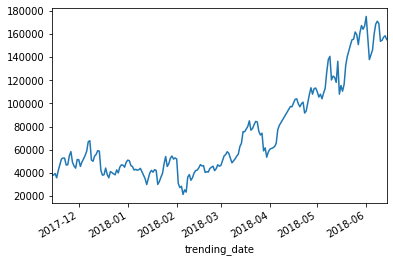

In [39]:
trend['likes'].plot()

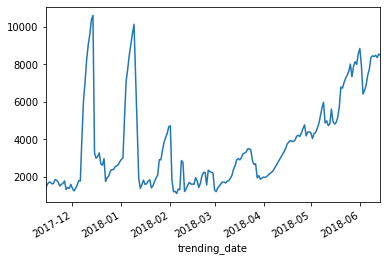

In [40]:
trend['dislikes'].plot()

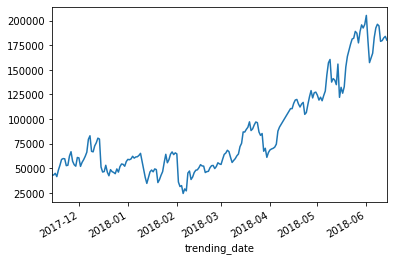

In [42]:
(trend['likes']+trend['dislikes']+trend['comment_count']).plot()